# SALES PREDICTION 

## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data collection and Preprocessing 

### Loading dataset 

In [2]:
s_df = pd.read_csv("advertising.csv")
s_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
s_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
s_df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
s_df.shape

(200, 4)

In [6]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
s_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
s_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
s_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [10]:
dup = s_df.duplicated()
print(s_df[dup])

Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


## Data Visualization 

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


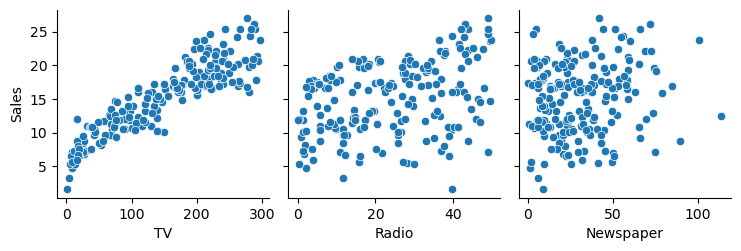

In [11]:
sns.pairplot(s_df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')

<Axes: >

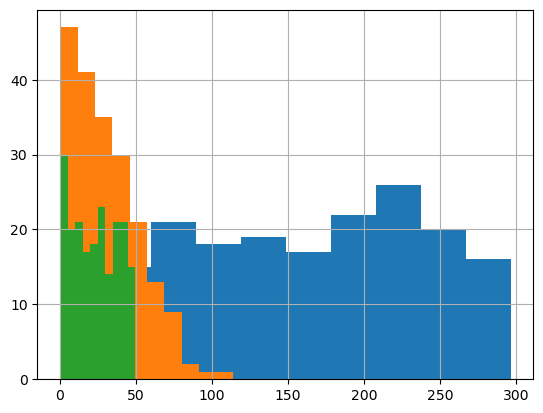

In [12]:
s_df['TV'].hist()
s_df['Newspaper'].hist()
s_df['Radio'].hist()

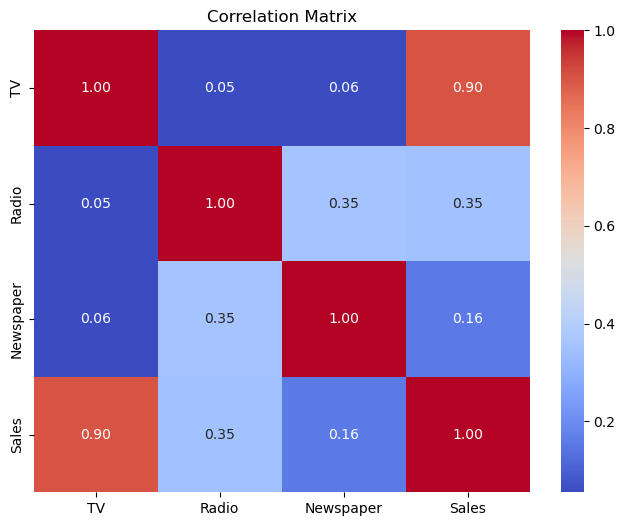

In [13]:
corr = s_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Data Modeling 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X = s_df.drop(columns = ['Sales'])
Y = s_df['Sales']

In [16]:
x_train, x_test,y_train, y_test = train_test_split(X ,Y ,test_size = 0.20)
print(Y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [17]:
model=LinearRegression()

In [18]:
model.fit(x_train, y_train)

LinearRegression()

In [19]:
prediction = model.predict(x_test)
prediction

array([16.57531107, 16.5923596 ,  5.51289237, 15.55616049, 12.32441646,
       20.77514785, 12.39044466, 18.23945034,  9.57269268, 13.31218879,
       23.33848301, 20.98334128,  8.74696703, 12.41081878,  6.3382335 ,
        8.4479468 , 18.10483998, 17.94447129, 15.1362074 , 11.89581035,
       24.73490725, 10.01401196, 19.27214869,  6.50624705, 15.7913929 ,
        8.92395999, 17.01851554,  8.41844903, 15.17669554, 12.60045337,
       15.58919382, 15.58269098, 20.09130332, 14.62452285, 10.76542689,
        7.16566808, 13.74325189, 19.98664369,  9.59361189, 23.29371601])

In [20]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  91.45414008279099
